Name : Haekal Rizky Yulianto 

NIM    : 17/415900/PA/18169

In [1]:
import numpy as np # Calculation
import matplotlib.pyplot as plt # Plotting
import random # Random seed
import cv2 # Read image

## K-Means Algorithm

K-Means Algrorithm from scratch

In [2]:
class KMeans:
    
    def __init__(self, n_clusters, iters=100):
        self.n_clusters = n_clusters
        self.iters = iters
    
    def fit(self, X):
        self.X = X
        
        # k seed points that we want to make centers
        points = random.choices(list(X), k=self.n_clusters) 
        
        # create clusters corresponding to seed points
        self.clusters = []
        for point in points:
            cluster = Cluster(point)
            self.clusters.append(cluster)
        
        for _ in range(self.iters):
            
            self.labels_ = []
            
            for point in X:
                distances = []
                for cluster in self.clusters:
                    dis = cluster.distance(point)
                    distances.append((dis, cluster))
                
                distances_np = np.array(distances)
                
                min_index = np.argmin(distances_np[:, 0].astype(int))
                selected = self.clusters[min_index]
                selected.points.append(point)
                self.labels_.append(min_index)
            
            for cluster in self.clusters:
                cluster.update_center()
    
class Cluster:
    
    def __init__(self,center):
        self.center = center
        self.points = []
        
    def distance(self, point):
        return np.sum((self.center-point)**2)
    
    def update_center(self):
        points = np.array(self.points)
        self.center = np.mean(points, axis=0)
        self.points = []     

## Load Image Data

We can switch between panoramic and biomedic image by deleting '#'

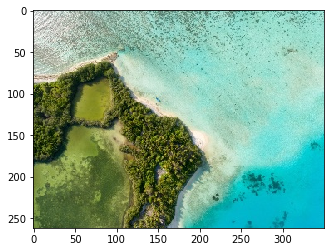

In [4]:
img = cv2.imread("/Users/Haekal/Documents/PR/pano-4.jpeg")
#img = cv2.imread("/Users/Haekal/Documents/PR/biom-8.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
img.shape

(262, 350, 3)

In [6]:
X = img.reshape(-1,3)

In [7]:
second = X.reshape(img.shape)

In [8]:
second.shape

(262, 350, 3)

In [9]:
X.shape
# len(X)

(91700, 3)

In [10]:
X3 = X2 = X

## 1st Model with K = 2

In [11]:
model = KMeans(2, 10)

In [12]:
model.fit(X)

In [13]:
color_pellet = model.clusters

In [14]:
centers = []
for cluster in color_pellet:
    centers.append(cluster.center)
centers = np.array(centers)

In [15]:
print('Centers Shape : ', centers.shape)
print('Centers : ', centers)

Centers Shape :  (2, 3)
Centers :  [[134.87810471 204.90473321 191.19664257]
 [ 82.86122934  98.33891462  46.43061467]]


In [16]:
gen = np.zeros([X.shape[0],3])

In [17]:
for i in range(len(gen)):
    gen[i] = model.clusters[model.labels_[i]].center
gen = gen.reshape(img.shape)

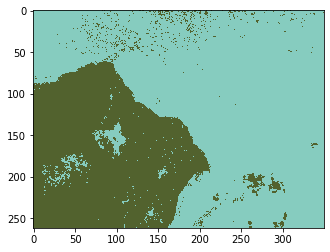

In [18]:
plt.imshow(gen/255)

## 2nd Model with K = 3

In [19]:
model2 = KMeans(3, 10)

In [20]:
model2.fit(X2)

In [21]:
color_pellet2 = model2.clusters

In [22]:
centers2 = []
for cluster2 in color_pellet2:
    centers2.append(cluster2.center)
centers2 = np.array(centers2)

In [23]:
print('Centers Shape : ', centers2.shape)
print('Centers : ', centers2)

Centers Shape :  (3, 3)
Centers :  [[160.67241309 209.29965157 190.60301029]
 [  8.97113208 182.87160377 193.23886792]
 [ 84.43887068  98.13669019  45.68657046]]


In [24]:
gen2 = np.zeros([X2.shape[0],3])

In [25]:
for i in range(len(gen2)):
    gen2[i] = model2.clusters[model2.labels_[i]].center
gen2 = gen2.reshape(img.shape)

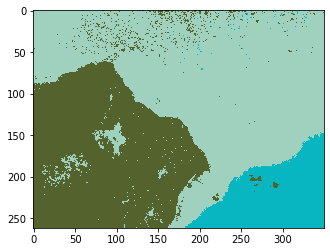

In [26]:
plt.imshow(gen2/255)

## Applying Elbow Method

In [27]:
from sklearn.cluster import KMeans

In [28]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X3)
    Sum_of_squared_distances.append(km.inertia_)

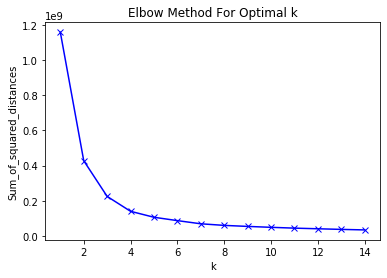

In [29]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()